In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_rip = pd.read_csv('ripple_event_chars.csv')
data_rip.shape

(176019, 17)

#Preprocessing

In [ ]:
data_rip.dtypes

inst_freq          float64
avg_freq           float64
amplitude          float64
auc                float64
duration           float64
p2p_dist           float64
power              float64
entropy            float64
num_of_peaks       float64
spect_entropy      float64
rat                  int64
study_day            int64
goal_location        int64
session              int64
homecage             int64
homecage_number      int64
trial                int64
dtype: object

# Adding the `ripple_type` column to the dataset (0: short, 1:long)

In [ ]:
data_rip['ripple_type'] = data_rip['duration'].apply(lambda x: 0 if x <= 0.1 else 1)

## changing data types

In [ ]:
data_rip['num_of_peaks'] = data_rip['num_of_peaks'].astype('int')

In [ ]:
data_rip[['study_day','goal_location','session','homecage','homecage_number','rat']] = data_rip[['study_day','goal_location','session','homecage','homecage_number','rat']].astype('category')

In [ ]:
data_rip.dtypes

inst_freq           float64
avg_freq            float64
amplitude           float64
auc                 float64
duration            float64
p2p_dist            float64
power               float64
entropy             float64
num_of_peaks          int64
spect_entropy       float64
rat                category
study_day          category
goal_location      category
session            category
homecage           category
homecage_number    category
trial                 int64
ripple_type           int64
dtype: object

# Plotting

In [ ]:
data_rip_rat4 = data_rip.loc[data_rip.rat == 4]
data_rip_rat1_2 = data_rip.loc[(data_rip.rat == 1) | (data_rip.rat == 2)]
print(data_rip_rat1_2.shape, data_rip_rat4.shape)

(116026, 18) (59993, 18)


In [ ]:
pd.unique(data_rip_rat1_2.loc[(data_rip_rat1_2['goal_location'] == 2) & (data_rip_rat1_2['session'] == 2) & (data_rip_rat1_2['trial'] == 3),'rat'])

[1, 2]
Categories (3, int64): [1, 2, 4]

In [ ]:
num = 2
for ngl in range(4):
  for ses in range(6):
    for h in range(1,6):
      all_rats_cond = ((data_rip_rat1_2['goal_location'] == ngl) & (data_rip_rat1_2['session'] == ses) & (data_rip_rat1_2['trial'] == h))
      if ngl == 3 and ses >= 2:
        num = 1
      else:
        num = 2
      if len(pd.unique(data_rip_rat1_2.loc[all_rats_cond,'rat'])) != num:
        drop_index = data_rip_rat1_2.loc[all_rats_cond].index
        data_rip_rat1_2.drop(drop_index , inplace=True)

In [ ]:
data_rip_rat1_2.reset_index(drop=True,inplace=True)
data_rip_rat1_2.shape

(116026, 18)

In [ ]:
data_rip_rat1_2_post = data_rip_rat1_2[data_rip_rat1_2.trial > 1]
data_rip_rat1_2_post.trial -= 1
data_rip_rat1_2_post.shape

(109778, 18)

In [ ]:
data_rip_rat1_2_post['trial'] = pd.Categorical(data_rip_rat1_2_post.trial, categories=[1,2,3,4], ordered=True)
data_rip_rat1_2_post['session'] = pd.Categorical(data_rip_rat1_2_post.session, categories=[0,1,2,3,4,5], ordered=True)
data_rip_rat1_2_post.dtypes

inst_freq           float64
avg_freq            float64
amplitude           float64
auc                 float64
duration            float64
p2p_dist            float64
power               float64
entropy             float64
num_of_peaks          int64
spect_entropy       float64
rat                category
study_day          category
goal_location      category
session            category
homecage           category
homecage_number    category
trial              category
ripple_type           int64
dtype: object

# Exclude the rows with `goal_location == 0`

In [ ]:
data_rip_rat1_2_post = data_rip_rat1_2_post[data_rip_rat1_2_post.goal_location != 0]
data_rip_rat1_2_post.shape

(102134, 18)

In [ ]:
def make_average_df(df):
  df_avg = pd.DataFrame(columns = ['goal_location','session','trial','mean_ampl','std_ampl','mean_dur','std_dur','mean_avg_freq','std_avg_freq','mean_auc','std_auc'])
  for ngl in pd.unique(df.goal_location):
    for ses in pd.unique(df.session):
      for h in range(1,5):
        x = df[(df['goal_location'] == ngl) & (df['session'] == ses) & (df['trial'] == h)]
        if len(x) != 0:
          row = {'goal_location': int(ngl), 'session': int(ses), 'trial': int(h), 'mean_ampl':x.amplitude.mean() , 'std_ampl':x.amplitude.std()/np.sqrt(len(x)) , 'mean_dur':x.duration.mean() , 'std_dur':x.duration.std()/np.sqrt(len(x)), 'mean_avg_freq':x.avg_freq.mean(),'std_avg_freq':x.avg_freq.std()/np.sqrt(len(x)),'mean_auc':x.auc.mean(),'std_auc':x.auc.std()/np.sqrt(len(x))}
          df_avg = df_avg.append(row, ignore_index=True)
  return df_avg

In [ ]:
data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 1].shape

(47662, 18)

In [ ]:
data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 0].shape

(54472, 18)

In [ ]:
data_short_rip_avg = make_average_df(data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 0])
data_long_rip_avg = make_average_df(data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 1])

In [ ]:
data_short_rip_avg

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,626.299834,37.856578,0.073826,0.000899,160.899663,0.846748,13.327888,0.836482
1,1.0,1.0,2.0,1215.560856,16.166048,0.069257,0.000504,148.856226,0.429779,24.607682,0.330834
2,1.0,1.0,3.0,1169.067345,17.451768,0.069599,0.000507,147.500220,0.428409,24.228180,0.369618
3,1.0,1.0,4.0,983.623837,36.448346,0.071042,0.000794,148.501517,0.773386,20.886550,0.793706
4,1.0,2.0,1.0,882.012520,37.515079,0.073561,0.000941,155.389430,0.934126,18.155127,0.765550
...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,3.0,4.0,216.832273,5.854026,0.070940,0.001226,139.597273,0.833954,4.640625,0.143786
72,5.0,1.0,1.0,162.274367,1.938031,0.072825,0.000622,138.916356,0.449731,3.580577,0.049142
73,5.0,1.0,2.0,158.679510,1.243250,0.073804,0.000399,141.283936,0.300625,3.453012,0.033042
74,5.0,1.0,3.0,162.465854,1.998395,0.073974,0.000520,139.530921,0.371357,3.504285,0.040617


In [ ]:
data_long_rip_avg

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,910.088698,41.036605,0.225962,0.016112,163.459973,0.656370,35.550502,1.703152
1,1.0,1.0,2.0,1370.875614,17.328258,0.165916,0.002644,150.684609,0.437407,49.396438,0.838969
2,1.0,1.0,3.0,1286.357912,20.099530,0.228353,0.015951,150.882948,0.415612,47.177480,0.910399
3,1.0,1.0,4.0,952.478088,44.396897,0.273276,0.036569,152.432288,0.764649,36.855959,1.965242
4,1.0,2.0,1.0,1230.893233,34.328296,0.207582,0.007504,160.819150,0.639656,48.617038,1.714042
...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,3.0,4.0,261.171777,5.637590,0.152893,0.005147,138.304355,0.741077,10.207262,0.382032
72,5.0,1.0,1.0,188.505112,2.219590,0.159001,0.004048,139.332631,0.403368,7.528535,0.144565
73,5.0,1.0,2.0,183.416905,1.797379,0.153030,0.002567,140.273868,0.315012,7.082666,0.106839
74,5.0,1.0,3.0,199.052228,5.990299,0.154360,0.002859,138.670262,0.399364,7.552699,0.152149


In [ ]:
def plot_3_goal_locations(df,feature_name, feature,event_type, rats , ripple_type):
  fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(17, 5))
  plt.subplots_adjust(hspace=0.6)
  fig.suptitle(f"Average {feature_name} ({rats}) of all {ripple_type} {event_type} events (Postsleep trials)", fontsize=18, y=1)
  for ngl, ax in zip(range(1,4), axes.ravel()):
    for key, group in df[df.goal_location == ngl].groupby('session'):
      ax.set_ylim(df[f'mean_{feature}'].min()-0.1*df[f'mean_{feature}'].min(), df[f'mean_{feature}'].max()+0.1*df[f'mean_{feature}'].max())
      group.plot('trial', f'mean_{feature}', yerr=f'std_{feature}', ax=ax)
      ax.set_title(f'Goal Location {ngl}')
      ax.legend(['session1' , 'session2','session3','session4','session5'])
      ax.set_ylabel(f'Average {feature_name}')
      ax.set_xlabel("Trial")
  
  plt.show()

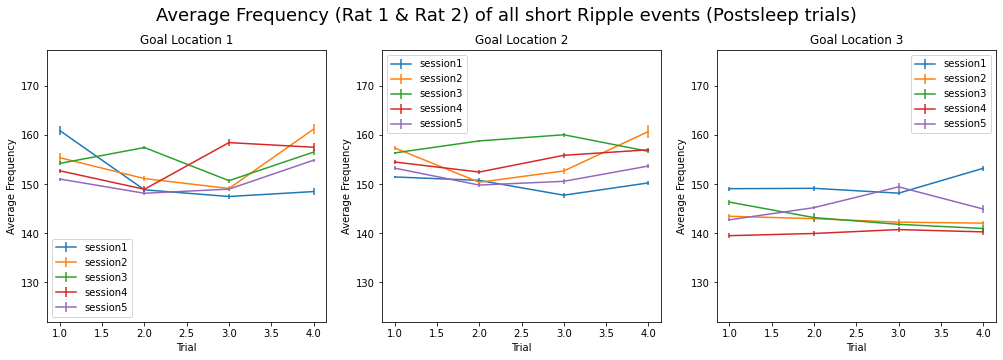

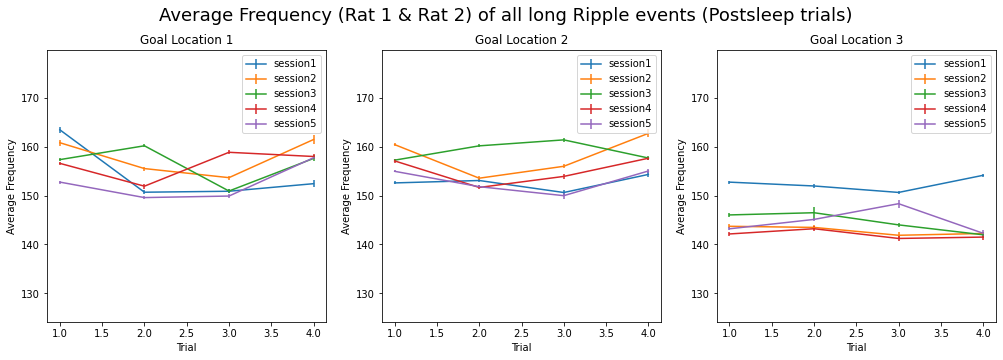

In [ ]:
plot_3_goal_locations(data_short_rip_avg,'Frequency','avg_freq','Ripple','Rat 1 & Rat 2','short')
plot_3_goal_locations(data_long_rip_avg,'Frequency','avg_freq','Ripple','Rat 1 & Rat 2','long')

In [ ]:
# plot_3_goal_locations(data_short_rip_avg,'Duration','dur','Ripple','Rat1 & Rat 2','short')
# plot_3_goal_locations(data_long_rip_avg,'Duration','dur','Ripple','Rat1 & Rat 2','long')

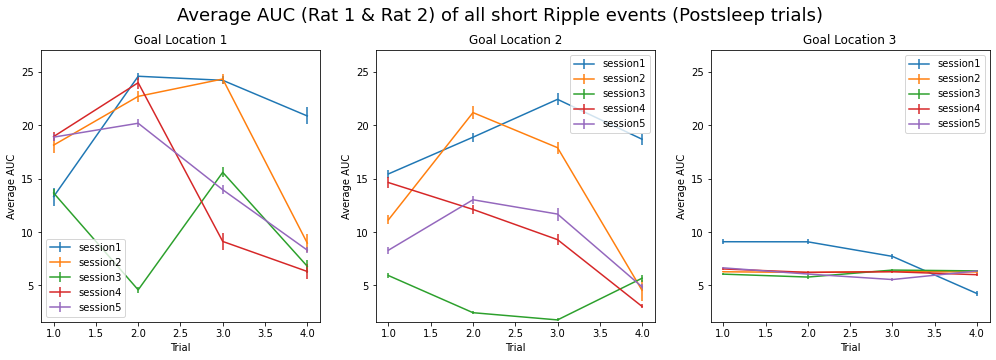

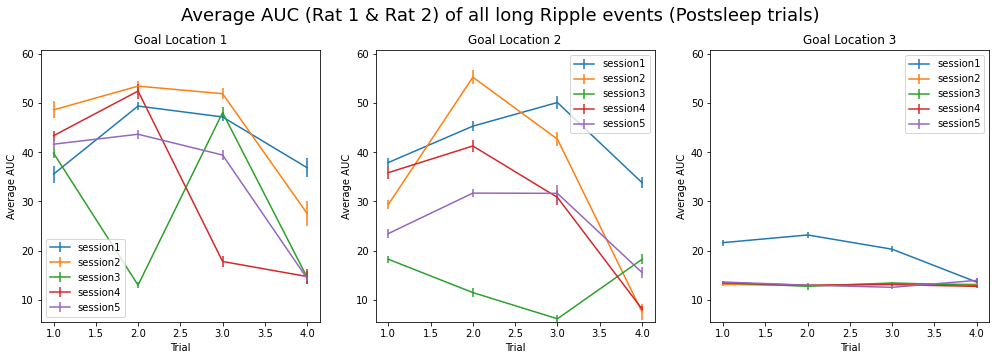

In [ ]:
plot_3_goal_locations(data_short_rip_avg,'AUC','auc','Ripple','Rat 1 & Rat 2','short')
plot_3_goal_locations(data_long_rip_avg,'AUC','auc','Ripple','Rat 1 & Rat 2','long')

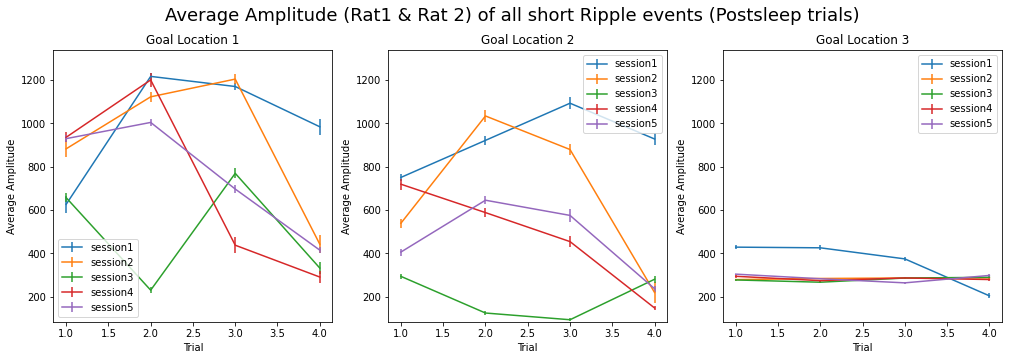

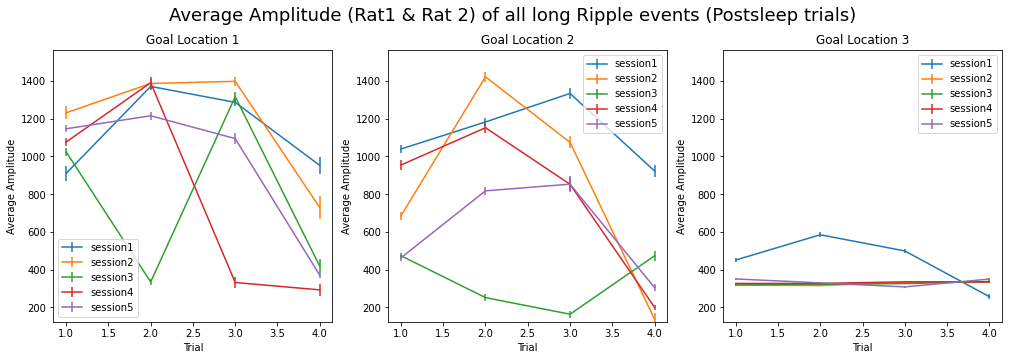

In [ ]:
plot_3_goal_locations(data_short_rip_avg,'Amplitude','ampl','Ripple','Rat1 & Rat 2','short')
plot_3_goal_locations(data_long_rip_avg,'Amplitude','ampl','Ripple','Rat1 & Rat 2','long')

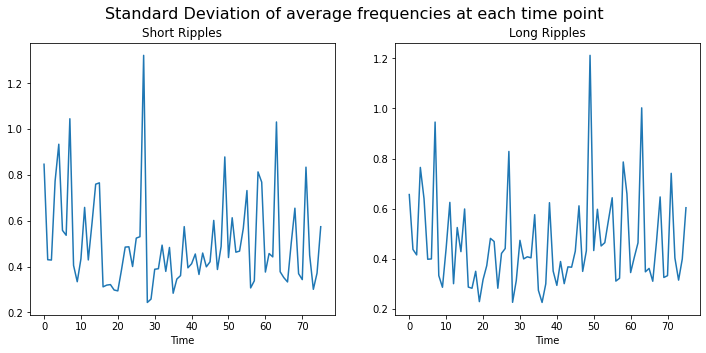

In [ ]:
fig , axes = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Standard Deviation of average frequencies at each time point', fontsize=16)
data_short_rip_avg.std_avg_freq.plot(ax = axes[0])
data_long_rip_avg.std_avg_freq.plot(ax = axes[1])
axes[0].set_title('Short Ripples')
axes[1].set_title('Long Ripples')
axes[0].set_xlabel('Time')
axes[1].set_xlabel('Time');

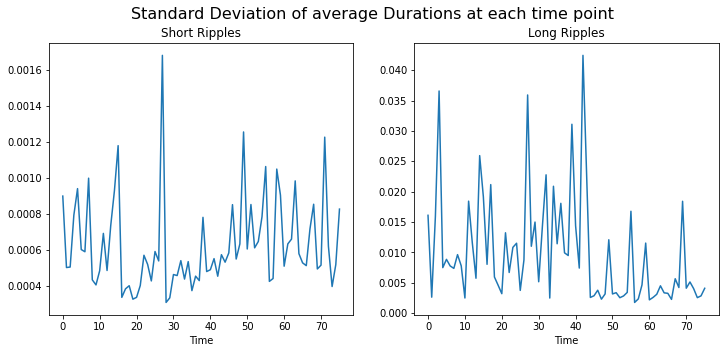

In [ ]:
fig , axes = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Standard Deviation of average Durations at each time point', fontsize=16)
data_short_rip_avg.std_dur.plot(ax = axes[0])
data_long_rip_avg.std_dur.plot(ax = axes[1])
axes[0].set_title('Short Ripples')
axes[1].set_title('Long Ripples')
axes[0].set_xlabel('Time')
axes[1].set_xlabel('Time');

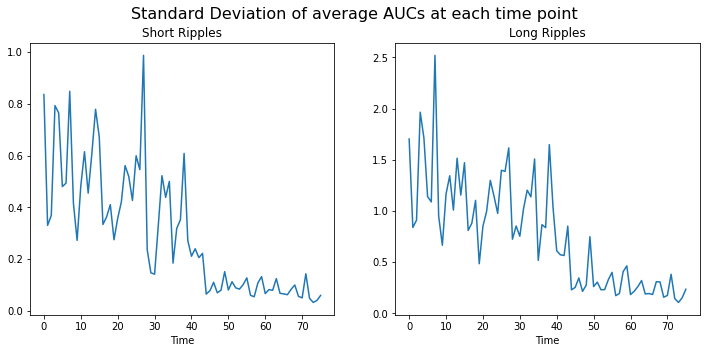

In [ ]:
# data_rip_avg.std_auc.plot()
# plt.title('Standard Deviation of average AUCs at each time point')
# plt.xlabel('Time')

fig , axes = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Standard Deviation of average AUCs at each time point', fontsize=16)
data_short_rip_avg.std_auc.plot(ax = axes[0])
data_long_rip_avg.std_auc.plot(ax = axes[1])
axes[0].set_title('Short Ripples')
axes[1].set_title('Long Ripples')
axes[0].set_xlabel('Time')
axes[1].set_xlabel('Time');

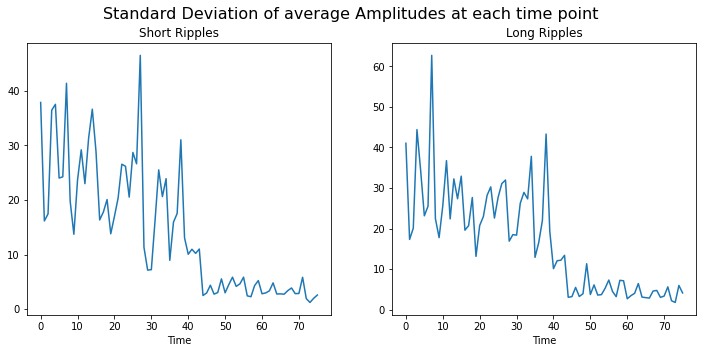

In [ ]:
# data_rip_avg.std_ampl.plot()
# plt.title('Standard Deviation of average Amplitudes at each time point')
# plt.xlabel('Time')

fig, axes = plt.subplots(1,2,figsize=(12,5))
fig.suptitle('Standard Deviation of average Amplitudes at each time point', fontsize=16)
data_short_rip_avg.std_ampl.plot(ax = axes[0])
data_long_rip_avg.std_ampl.plot(ax = axes[1])
axes[0].set_title('Short Ripples')
axes[1].set_title('Long Ripples')
axes[0].set_xlabel('Time')
axes[1].set_xlabel('Time');

## Rat4 Ripple Events Plots


In [ ]:
data_rip_rat4_post = data_rip_rat4[data_rip_rat4.trial > 1]
data_rip_rat4_post.trial -= 1
data_rip_rat4_post['trial'] = pd.Categorical(data_rip_rat4_post.trial, categories=[1,2,3,4], ordered=True)
data_rip_rat4_post['session'] = pd.Categorical(data_rip_rat4_post.session, categories=[0,1,2,3,4,5], ordered=True)
data_rip_rat4_post.dtypes

inst_freq           float64
avg_freq            float64
amplitude           float64
auc                 float64
duration            float64
p2p_dist            float64
power               float64
entropy             float64
num_of_peaks          int64
spect_entropy       float64
rat                category
study_day          category
goal_location      category
session            category
homecage           category
homecage_number    category
trial              category
ripple_type           int64
dtype: object

In [ ]:
data_rip_rat4_post = data_rip_rat4_post[data_rip_rat4_post.goal_location != 0]
data_rip_rat4_post.shape

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,rat,study_day,goal_location,session,homecage,homecage_number,trial,ripple_type
129949,155.987426,160.719851,631.330313,25.995829,0.195000,1206.859735,36090.579231,0.998682,32,5.318883,4,4,1,1,0,0,1,1
129950,168.475372,180.023126,415.134022,16.651768,0.120000,694.334307,29483.539119,0.997772,21,5.543314,4,4,1,1,0,0,1,1
129951,157.855027,153.959362,439.751576,15.757083,0.151667,709.555197,18893.619550,0.999913,26,5.227824,4,4,1,1,0,0,1,1
129952,181.816504,166.829850,375.813073,6.966409,0.083333,672.808464,15149.876041,1.114067,15,5.396970,4,4,1,1,0,0,1,0
129953,161.577484,169.261359,507.129353,24.412337,0.245000,932.678394,18549.535148,1.050745,42,5.184929,4,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175077,141.158340,144.342161,222.968393,4.304162,0.065000,377.170784,7004.558290,0.995727,9,5.470967,4,14,3,2,0,0,4,0
175078,178.039153,169.969280,356.601023,4.048322,0.065000,555.523559,7892.392945,1.250918,12,5.685140,4,14,3,2,0,0,4,0
175079,141.387855,145.756512,244.302699,4.527825,0.075000,329.467245,5606.933748,0.999644,11,5.396052,4,14,3,2,0,0,4,0
175080,149.449536,149.370525,192.267095,3.685282,0.065000,328.594129,5296.660137,0.999526,10,5.549068,4,14,3,2,0,0,4,0


In [ ]:
print(f"short: {data_rip_rat4[data_rip_rat4.ripple_type == 0].shape}, long: {data_rip_rat4[data_rip_rat4.ripple_type == 1].shape}")

short: (38081, 18), long: (21912, 18)


In [ ]:
data_short_rip_avg4 = make_average_df(data_rip_rat4_post[data_rip_rat4_post.ripple_type == 0])
data_long_rip_avg4 = make_average_df(data_rip_rat4_post[data_rip_rat4_post.ripple_type == 1])

In [ ]:
data_short_rip_avg4

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,370.883125,5.404070,0.072149,0.000508,150.673919,0.439854,7.518141,0.103628
1,1.0,1.0,2.0,368.738807,7.452332,0.073031,0.000720,149.687821,0.610794,7.671757,0.153247
2,1.0,1.0,3.0,371.586910,5.480914,0.072025,0.000529,148.756085,0.419392,7.863015,0.119619
3,1.0,1.0,4.0,382.347655,5.881093,0.070386,0.000490,147.879680,0.384533,7.968124,0.120056
4,1.0,2.0,1.0,297.070714,3.070502,0.072565,0.000335,153.702086,0.324214,6.094321,0.054102
5,1.0,2.0,2.0,285.209439,2.790581,0.072264,0.000365,151.462178,0.306756,5.941205,0.058700
6,1.0,2.0,3.0,286.416687,2.768732,0.072815,0.000398,149.793235,0.333767,5.996706,0.058320
7,1.0,2.0,4.0,276.489040,2.580086,0.072234,0.000366,149.837974,0.298356,5.721204,0.056125
8,1.0,3.0,1.0,290.537966,2.708838,0.072661,0.000362,153.236121,0.320656,6.055349,0.056383
9,1.0,3.0,2.0,283.762750,3.336876,0.072480,0.000453,150.626675,0.378234,5.867652,0.070031


In [ ]:
data_long_rip_avg4

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,462.973274,7.506189,0.158340,0.002556,153.357659,0.483620,16.297501,0.316331
1,1.0,1.0,2.0,458.223932,10.781719,0.160388,0.005132,153.126876,0.706533,16.602705,0.573454
2,1.0,1.0,3.0,462.256529,8.406049,0.153685,0.002735,150.865548,0.472895,16.219006,0.353758
3,1.0,1.0,4.0,472.580478,9.077689,0.146296,0.002383,149.443715,0.444310,16.344061,0.347587
4,1.0,2.0,1.0,352.935905,4.291612,0.165597,0.004629,156.013335,0.342668,12.880439,0.179741
5,1.0,2.0,2.0,349.957331,4.490396,0.153666,0.002474,152.955963,0.350875,12.517770,0.178625
6,1.0,2.0,3.0,342.853548,4.896369,0.162453,0.004812,151.338436,0.426334,12.574277,0.228265
7,1.0,2.0,4.0,347.852941,5.430531,0.151499,0.001860,151.264386,0.347917,12.495351,0.189627
8,1.0,3.0,1.0,349.709877,3.863491,0.154118,0.002062,156.130793,0.362850,12.402752,0.160616
9,1.0,3.0,2.0,347.763266,5.194119,0.156305,0.003018,152.135820,0.474220,12.843189,0.231304


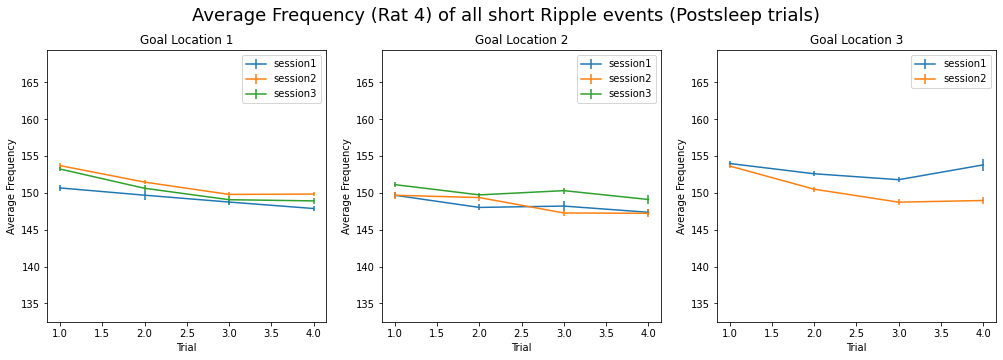

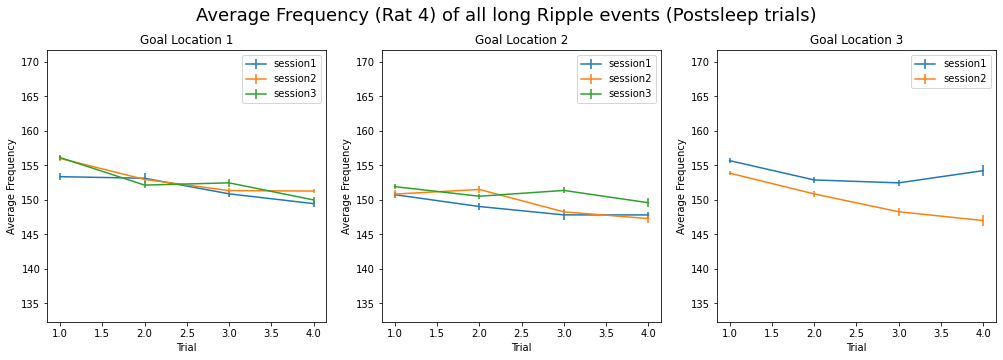

In [ ]:
plot_3_goal_locations(data_short_rip_avg4,'Frequency','avg_freq','Ripple','Rat 4','short')
plot_3_goal_locations(data_long_rip_avg4,'Frequency','avg_freq','Ripple','Rat 4','long')

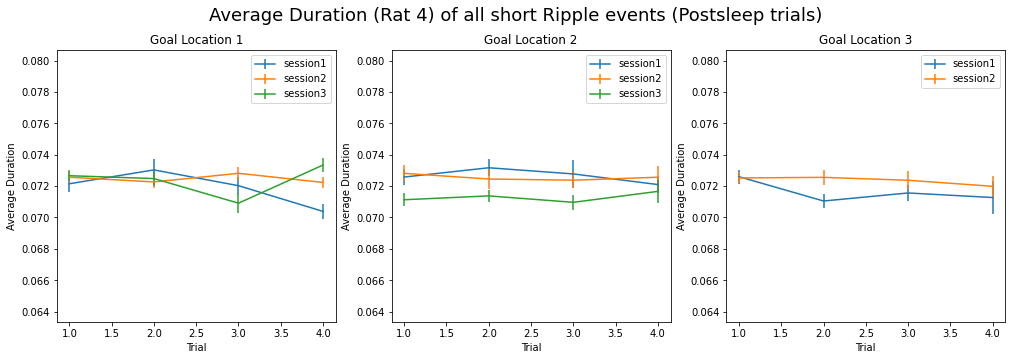

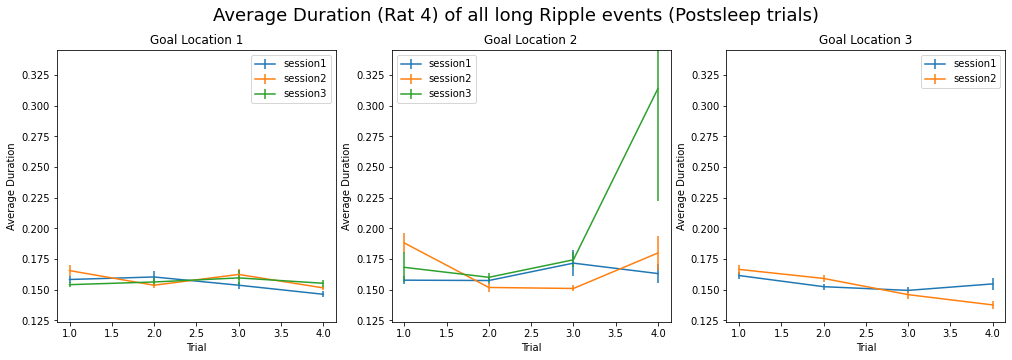

In [ ]:
# plot_3_goal_locations(data_rip_avg4,'Duration','dur','Ripple','Rat 4')
plot_3_goal_locations(data_short_rip_avg4,'Duration','dur','Ripple','Rat 4','short')
plot_3_goal_locations(data_long_rip_avg4,'Duration','dur','Ripple','Rat 4','long')

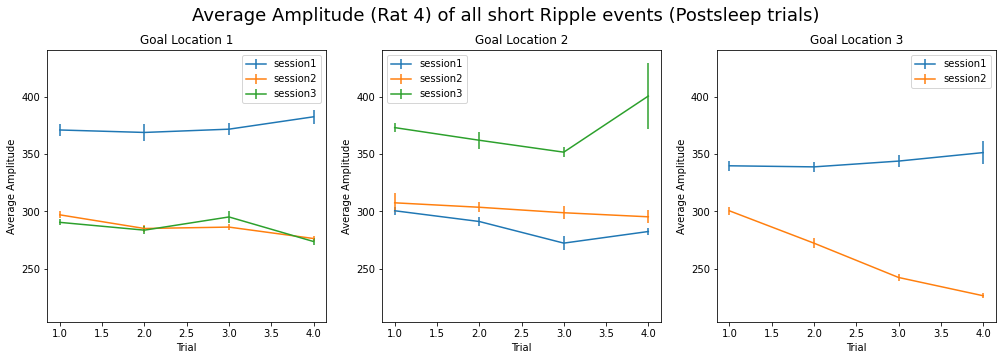

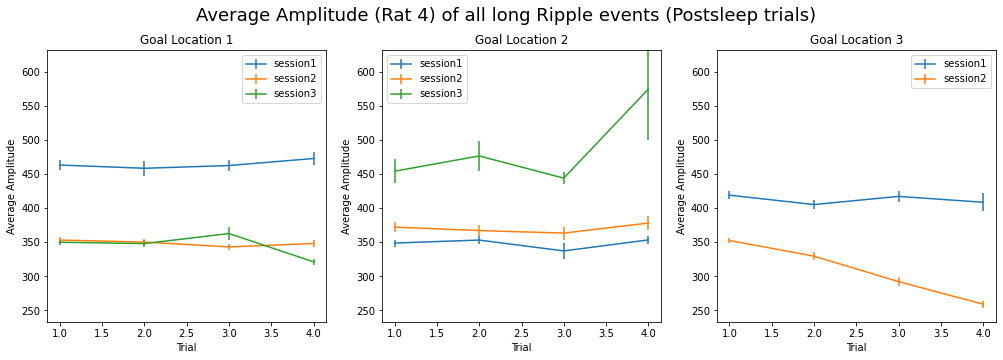

In [ ]:
# plot_3_goal_locations(data_rip_avg4,'Amplitude','ampl','Ripple','Rat 4')
plot_3_goal_locations(data_short_rip_avg4,'Amplitude','ampl','Ripple','Rat 4','short')
plot_3_goal_locations(data_long_rip_avg4,'Amplitude','ampl','Ripple','Rat 4','long')

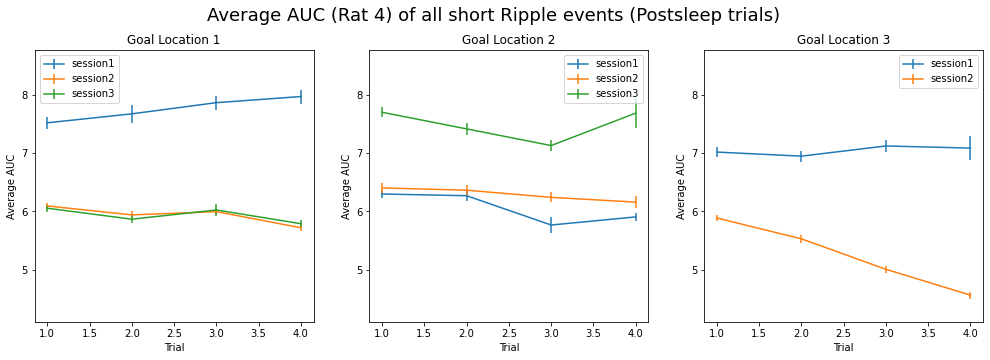

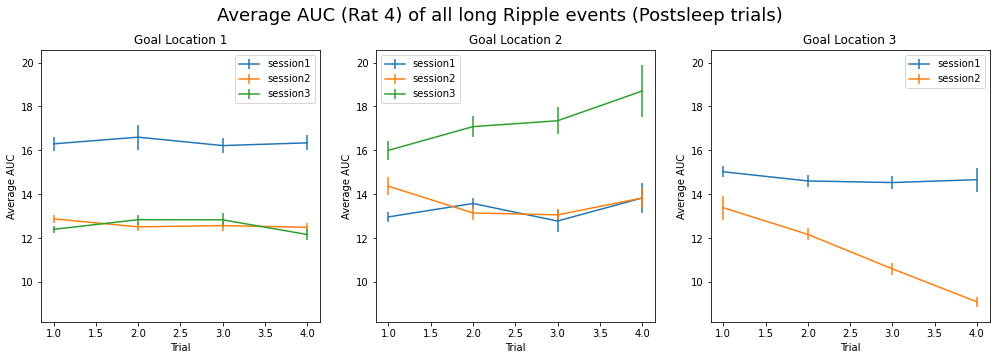

In [ ]:
# plot_3_goal_locations(data_rip_avg4,'AUC','auc','Ripple','Rat 4')
plot_3_goal_locations(data_short_rip_avg4,'AUC','auc','Ripple','Rat 4','short')
plot_3_goal_locations(data_long_rip_avg4,'AUC','auc','Ripple','Rat 4','long')


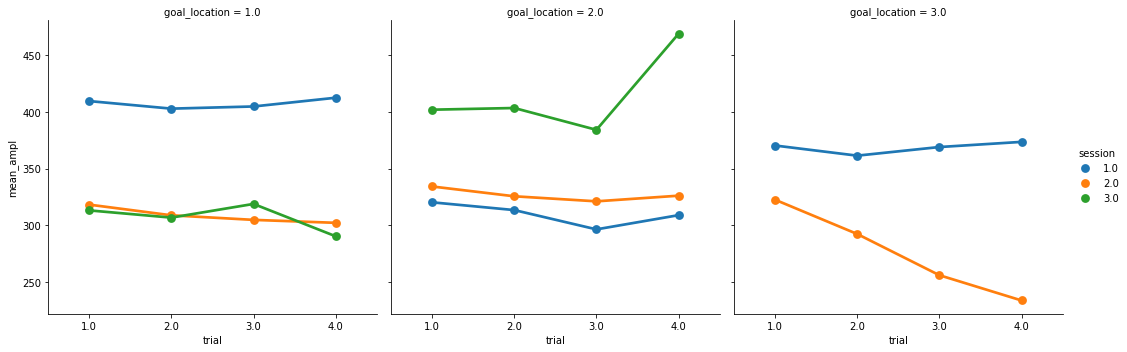

In [ ]:
# sns.catplot(data=data_rip_avg4.groupby('goal_location'), x="trial", y="mean_ampl", kind="point")
fg = sns.factorplot(x='trial', y='mean_ampl', hue='session', 
                        col='goal_location', data=data_rip_avg4, kind='point')

# Spindle Events plots

In [ ]:
data_spd = pd.read_csv('spindle_event_chars.csv')
data_spd.shape

(33719, 18)

In [ ]:
data_spd['num_of_peaks'] = data_spd['num_of_peaks'].astype('int')
data_spd[['study_day','goal_location','session','homecage','homecage_number','rat']] = data_spd[['study_day','goal_location','session','homecage','homecage_number','rat']].astype('category')
data_spd.dtypes

inst_freq           float64
avg_freq            float64
amplitude           float64
auc                 float64
duration            float64
p2p_dist            float64
power               float64
entropy             float64
num_of_peaks          int64
spect_entropy       float64
study_day          category
goal_location      category
session            category
homecage           category
homecage_number    category
trial                 int64
rat                category
file_name            object
dtype: object

In [ ]:
data_spd_rat4 = data_spd.loc[data_spd.rat == 4]
data_spd_rat1_2 = data_spd.loc[(data_spd.rat == 1) | (data_spd.rat == 2)]
print(data_spd_rat4.shape, data_spd_rat1_2.shape)

(9076, 18) (24643, 18)


In [ ]:
num = 2
for ngl in range(4):
  for ses in range(6):
    for h in range(1,6):
      all_rats_cond = ((data_spd_rat1_2['goal_location'] == ngl) & (data_spd_rat1_2['session'] == ses) & (data_spd_rat1_2['trial'] == h))
      if ngl == 3 and ses >= 2:
        num = 1
      else:
        num = 2
      if len(pd.unique(data_spd_rat1_2.loc[all_rats_cond,'rat'])) != num:
        drop_index = data_spd_rat1_2.loc[all_rats_cond].index
        data_spd_rat1_2.drop(drop_index , inplace=True)

In [ ]:
data_spd_rat1_2.reset_index(drop=True,inplace=True)
data_spd_rat1_2_post = data_spd_rat1_2[data_spd_rat1_2.trial > 1]
data_spd_rat1_2_post.trial -= 1

data_spd_rat1_2_post['trial'] = pd.Categorical(data_spd_rat1_2_post.trial, categories=[1,2,3,4], ordered=True)
data_spd_rat1_2_post['session'] = pd.Categorical(data_spd_rat1_2_post.session, categories=[0,1,2,3,4,5], ordered=True)

data_spd_rat1_2_post = data_spd_rat1_2_post[data_spd_rat1_2_post.goal_location != 0]
data_spd_rat1_2_post

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,study_day,goal_location,session,homecage,homecage_number,trial,rat,file_name
1263,11.743494,12.068517,837.879334,554.704612,2.311667,1600.488532,86120.732126,0.999991,27,9.271309,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
1264,12.501849,11.624163,731.734706,238.303587,0.940000,1401.385944,94819.318377,1.016931,11,8.053646,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
1265,13.865759,11.415286,1276.915608,817.419549,2.698333,2151.543876,170950.595058,0.958815,25,8.786542,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
1266,11.796996,11.180639,3508.736102,604.868025,0.996667,6694.332399,887717.125029,1.030249,10,7.987219,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
1267,12.692595,11.559248,822.474634,279.385577,0.991667,1542.491210,109233.467058,0.999949,12,8.234038,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24608,12.837571,11.994215,372.571710,159.622991,1.170000,719.740447,28162.833526,0.999977,15,8.249044,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep
24609,17.147902,13.138947,453.864344,86.777901,0.601667,824.314520,32836.642771,1.039183,8,7.027474,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep
24610,18.609519,11.645920,371.806992,63.129148,0.490000,709.654089,24584.045758,1.087092,6,7.279542,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep
24611,13.027078,11.793697,761.206545,158.808073,0.905000,1448.175220,53000.564389,0.999117,12,8.098699,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep


In [ ]:
data_spd_avg = make_average_df(data_spd_rat1_2_post)
data_spd_avg

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,706.628712,32.056561,1.487066,0.064026,11.761517,0.049687,302.520204,16.969537
1,1.0,1.0,2.0,554.932391,10.201267,1.541729,0.037209,11.947036,0.025904,245.455926,6.719951
2,1.0,1.0,3.0,530.160309,6.973446,1.513063,0.033907,11.961994,0.024460,231.151527,5.275775
3,1.0,1.0,4.0,585.915957,13.845183,1.450376,0.048225,11.917666,0.039670,251.818328,9.620240
4,1.0,2.0,1.0,1107.216303,70.115087,1.233972,0.075902,12.150893,0.104924,346.119192,24.685326
...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,3.0,4.0,482.335921,10.642640,1.457770,0.091843,11.950508,0.067556,209.540975,12.096199
72,5.0,1.0,1.0,387.149580,5.850830,1.597390,0.075577,12.201556,0.073973,185.096501,8.265552
73,5.0,1.0,2.0,410.109446,4.521386,1.423025,0.039092,12.081130,0.029171,173.279501,4.473646
74,5.0,1.0,3.0,438.483765,6.133618,1.464425,0.042691,12.010878,0.031623,186.805964,5.307437


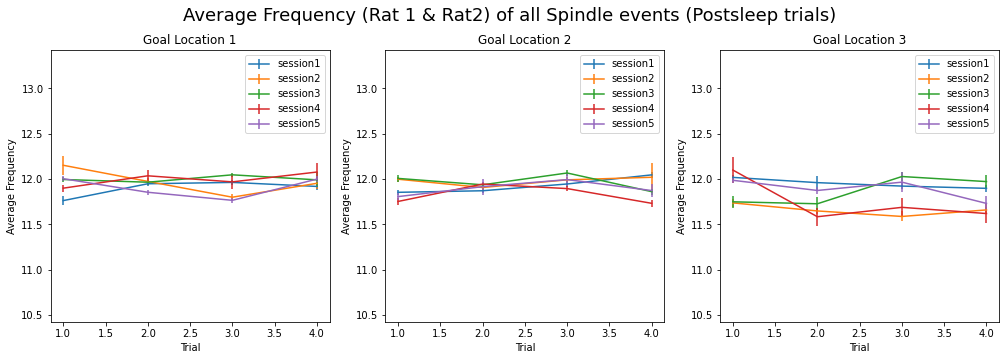

In [ ]:
plot_3_goal_locations(data_spd_avg,'Frequency','avg_freq','Spindle','Rat 1 & Rat2')

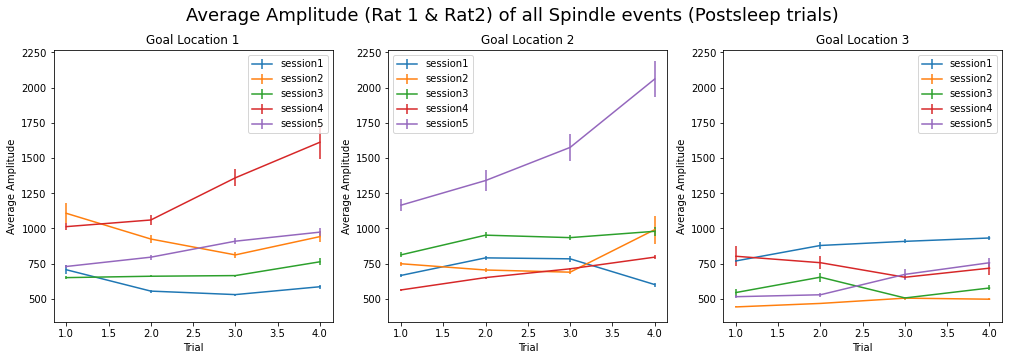

In [ ]:
plot_3_goal_locations(data_spd_avg,'Amplitude','ampl','Spindle','Rat 1 & Rat2')

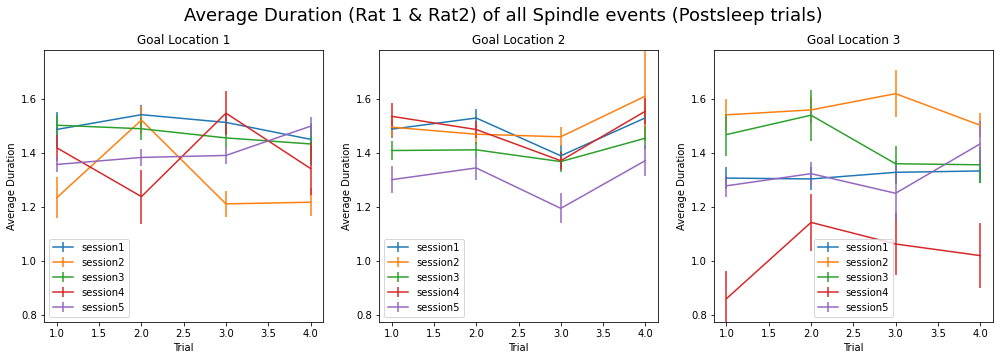

In [ ]:
plot_3_goal_locations(data_spd_avg,'Duration','dur','Spindle','Rat 1 & Rat2')

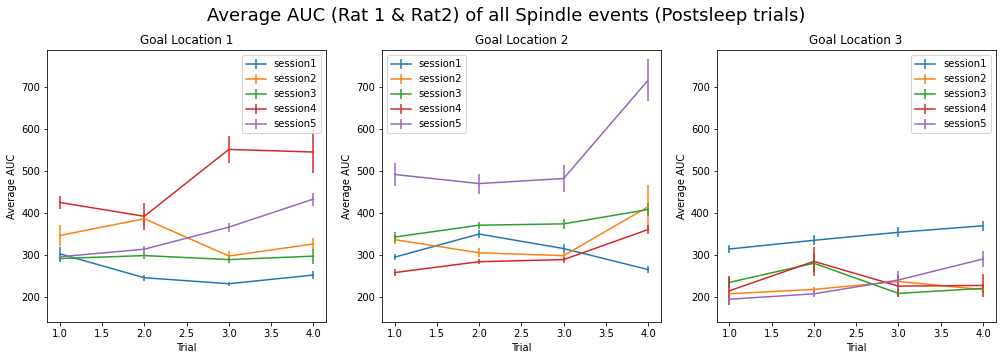

In [ ]:
plot_3_goal_locations(data_spd_avg,'AUC','auc','Spindle','Rat 1 & Rat2')

## Rat 4 spindle events plots

In [ ]:
data_spd_rat4_post = data_spd_rat4[data_spd_rat4.trial > 1]
data_spd_rat4_post.trial -= 1
data_spd_rat4_post['trial'] = pd.Categorical(data_spd_rat4_post.trial, categories=[1,2,3,4], ordered=True)
data_spd_rat4_post['session'] = pd.Categorical(data_spd_rat4_post.session, categories=[0,1,2,3,4,5], ordered=True)
data_spd_rat4_post.dtypes

inst_freq           float64
avg_freq            float64
amplitude           float64
auc                 float64
duration            float64
p2p_dist            float64
power               float64
entropy             float64
num_of_peaks          int64
spect_entropy       float64
study_day          category
goal_location      category
session            category
homecage           category
homecage_number    category
trial              category
rat                category
file_name            object
dtype: object

In [ ]:
data_spd_rat4_post = data_spd_rat4_post[data_spd_rat4_post.goal_location != 0]
data_spd_rat4_post

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,study_day,goal_location,session,homecage,homecage_number,trial,rat,file_name
26464,11.388881,11.634930,528.525556,215.464453,1.438333,1000.203685,35331.241167,1.020243,18,8.010179,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
26465,16.163539,11.407966,468.546286,99.927148,0.585000,911.099301,43850.348411,0.999010,6,7.012849,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
26466,17.219360,12.517050,509.011204,97.497042,0.571667,985.408032,42335.746105,0.999700,6,6.907970,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
26467,19.977447,12.620879,469.960207,69.156575,0.468333,880.721043,35619.807919,0.999991,6,7.074677,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
26468,17.884095,11.088402,451.929561,74.169287,0.486667,870.101397,34978.013425,0.996613,5,5.858687,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33527,19.125196,11.358144,515.328837,81.437541,0.471667,994.361824,48936.549191,0.994363,5,6.955780,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep
33528,12.365871,11.148210,557.949264,172.214877,0.916667,1089.267153,54034.354860,0.999389,11,7.899933,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep
33529,10.353714,11.254979,413.019789,299.614768,1.938333,807.899294,34047.707954,0.999880,21,8.842766,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep
33530,13.209216,11.033009,580.232021,165.335469,0.800000,1110.565361,65237.959324,1.019221,9,7.028968,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep


In [ ]:
data_spd_avg4 = make_average_df(data_spd_rat4_post)
data_spd_avg4

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,509.236653,10.831155,1.550303,0.081863,11.568863,0.056443,235.447248,12.280153
1,1.0,1.0,2.0,539.133989,12.121478,1.280615,0.067139,11.828928,0.057837,196.791472,8.938095
2,1.0,1.0,3.0,549.720876,6.952859,1.303456,0.045133,11.831764,0.037319,198.188364,6.343205
3,1.0,1.0,4.0,550.708182,6.625791,1.381908,0.041999,11.777517,0.032603,212.528039,6.306062
4,1.0,2.0,1.0,598.521922,7.492839,1.449467,0.038163,11.892870,0.026200,241.996772,6.204521
5,1.0,2.0,2.0,669.485312,12.206124,1.184586,0.037456,11.879667,0.033584,217.808300,6.978401
6,1.0,2.0,3.0,793.477541,27.981639,1.257268,0.042031,11.898589,0.044608,256.568593,10.713493
7,1.0,2.0,4.0,642.569013,17.237770,1.247072,0.048100,11.824647,0.043461,216.058704,7.994393
8,1.0,3.0,1.0,557.378210,5.753826,1.383268,0.037511,11.872293,0.027274,224.716262,5.983398
9,1.0,3.0,2.0,621.865704,12.609315,1.171051,0.043156,11.916453,0.042210,200.526917,7.227656


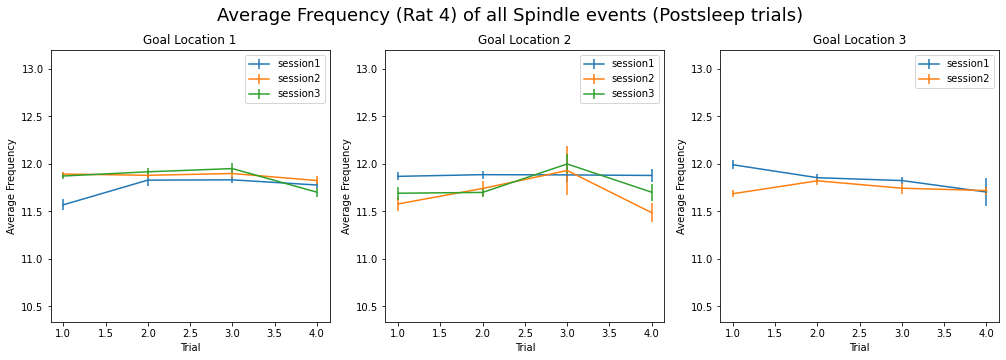

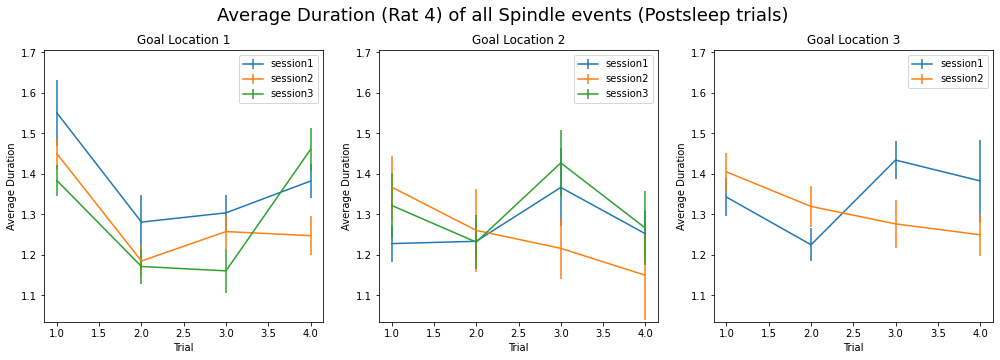

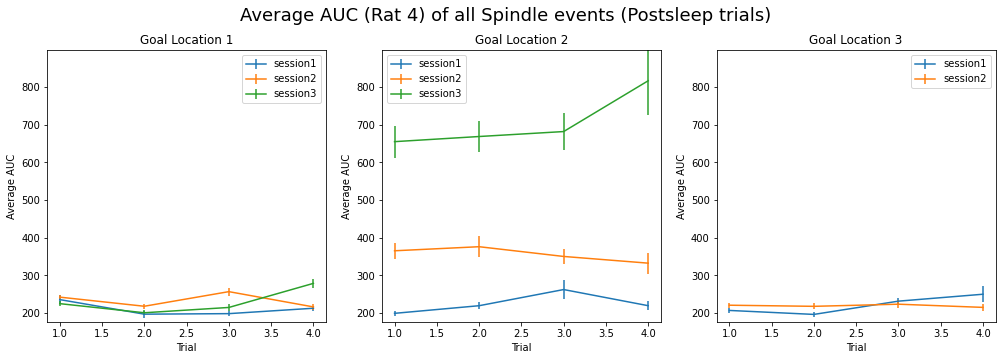

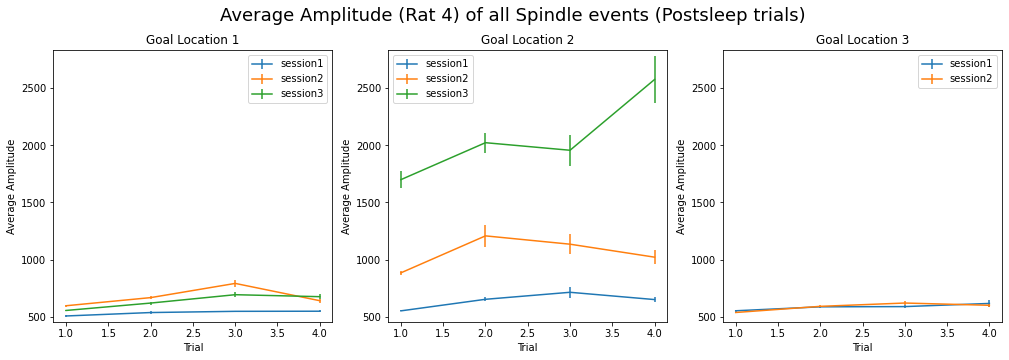

In [ ]:
plot_3_goal_locations(data_spd_avg4,'Frequency','avg_freq','Spindle','Rat 4')
plot_3_goal_locations(data_spd_avg4,'Duration','dur','Spindle','Rat 4')
plot_3_goal_locations(data_spd_avg4,'AUC','auc','Spindle','Rat 4')
plot_3_goal_locations(data_spd_avg4,'Amplitude','ampl','Spindle','Rat 4')

# Delta Events plots

In [ ]:
data_delta = pd.read_csv('delta_event_chars.csv')
data_delta.shape

(152454, 18)

In [ ]:
data_delta['num_of_peaks'] = data_delta['num_of_peaks'].astype('int')
data_delta[['study_day','goal_location','session','homecage','homecage_number','rat']] = data_delta[['study_day','goal_location','session','homecage','homecage_number','rat']].astype('category')
data_delta.dtypes

inst_freq           float64
avg_freq            float64
amplitude           float64
auc                 float64
duration            float64
p2p_dist            float64
power               float64
entropy             float64
num_of_peaks          int64
spect_entropy       float64
study_day          category
goal_location      category
session            category
homecage           category
homecage_number    category
trial                 int64
rat                category
file_name            object
dtype: object

In [ ]:
data_delta_rat4 = data_delta.loc[data_delta.rat == 4]
data_delta_rat1_2 = data_delta.loc[(data_delta.rat == 1) | (data_delta.rat == 2)]
print(data_delta_rat4.shape, data_delta_rat1_2.shape)

(42464, 18) (109990, 18)


In [ ]:
num = 2
for ngl in range(4):
  for ses in range(6):
    for h in range(1,6):
      all_rats_cond = ((data_delta_rat1_2['goal_location'] == ngl) & (data_delta_rat1_2['session'] == ses) & (data_delta_rat1_2['trial'] == h))
      if ngl == 3 and ses >= 2:
        num = 1
      else:
        num = 2
      if len(pd.unique(data_delta_rat1_2.loc[all_rats_cond,'rat'])) != num:
        drop_index = data_delta_rat1_2.loc[all_rats_cond].index
        data_delta_rat1_2.drop(drop_index , inplace=True)

In [ ]:
data_delta_rat1_2.reset_index(drop=True,inplace=True)
data_delta_rat1_2_post = data_delta_rat1_2[data_delta_rat1_2.trial > 1]
data_delta_rat1_2_post.trial -= 1

data_delta_rat1_2_post['trial'] = pd.Categorical(data_delta_rat1_2_post.trial, categories=[1,2,3,4], ordered=True)
data_delta_rat1_2_post['session'] = pd.Categorical(data_delta_rat1_2_post.session, categories=[0,1,2,3,4,5], ordered=True)

data_delta_rat1_2_post = data_delta_rat1_2_post[data_delta_rat1_2_post.goal_location != 0]
data_delta_rat1_2_post

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,study_day,goal_location,session,homecage,homecage_number,trial,rat,file_name
5911,17.980149,2.469344,355.709575,84.008280,0.413333,614.388372,4.980509e+04,0.982997,1,5.815979,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
5912,16.473366,2.506610,495.523520,114.550163,0.426667,842.214814,8.947373e+04,0.987238,1,6.287211,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
5913,16.485266,2.457886,492.508954,128.558162,0.440000,895.108592,1.031678e+05,0.992992,1,6.961461,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
5914,19.417883,2.721884,433.918813,88.835327,0.371667,756.716981,7.125864e+04,0.997547,1,5.850455,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
5915,22.704400,3.145783,386.925717,72.044248,0.318333,723.183144,6.466716e+04,0.996656,1,5.848970,3,1,1,0,0,1,1,Rat_Hm_Ephys_Rat1_389236_20200909_postsleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109742,16.358045,2.319331,1734.648378,406.615027,0.451667,2987.621494,1.033645e+06,1.017164,1,6.848054,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep
109743,16.909266,2.719181,1449.437902,311.312850,0.438333,2547.555575,6.489850e+05,0.985676,1,7.043077,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep
109744,19.917442,2.616630,1498.235046,312.111091,0.368333,2620.238778,8.939711e+05,0.977418,1,5.888470,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep
109745,16.719144,3.013277,1387.151497,275.288476,0.430000,2264.834647,5.076594e+05,0.893263,2,6.774080,24,5,1,0,0,4,2,Rat_Hm_Ephys_Rat2_389237_20201112_postsleep


In [ ]:
data_delta_avg = make_average_df(data_delta_rat1_2_post)
data_delta_avg

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,896.949644,20.993292,0.408110,0.001149,3.323837,0.039298,137.872466,2.805232
1,1.0,1.0,2.0,964.279689,11.269811,0.404025,0.000793,3.400206,0.025469,146.468073,1.731046
2,1.0,1.0,3.0,906.285205,9.217438,0.404687,0.000751,3.463300,0.026843,135.978787,1.350112
3,1.0,1.0,4.0,878.686063,14.798024,0.405430,0.001237,3.512774,0.042312,130.930840,2.167618
4,1.0,2.0,1.0,1690.193657,61.751302,0.415062,0.001319,3.157433,0.038964,289.044975,11.162234
...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,3.0,4.0,743.297482,23.011343,0.407123,0.002250,3.472884,0.075883,106.552588,2.931226
72,5.0,1.0,1.0,1405.625171,66.107510,0.396330,0.001791,4.129144,0.147518,138.859553,3.982893
73,5.0,1.0,2.0,903.478205,18.523286,0.402698,0.001051,3.638337,0.039498,111.706943,1.524955
74,5.0,1.0,3.0,1010.884404,20.258311,0.401039,0.001148,3.732417,0.044763,121.357473,2.138988


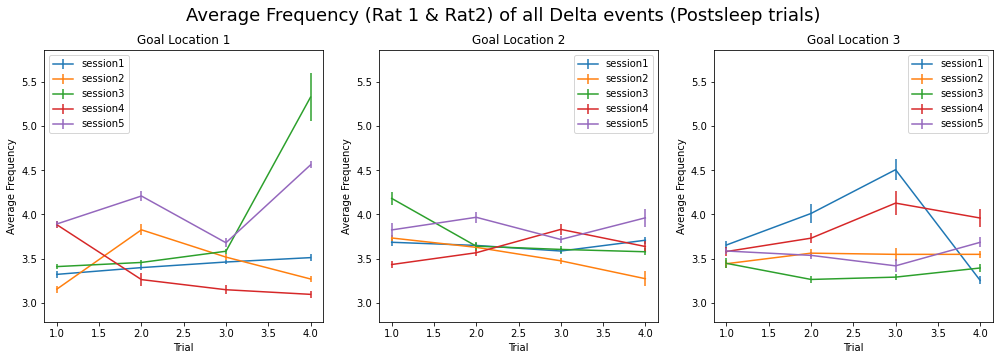

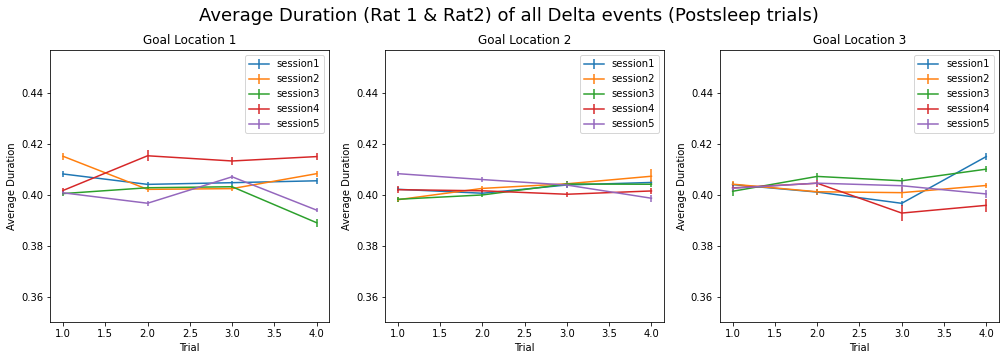

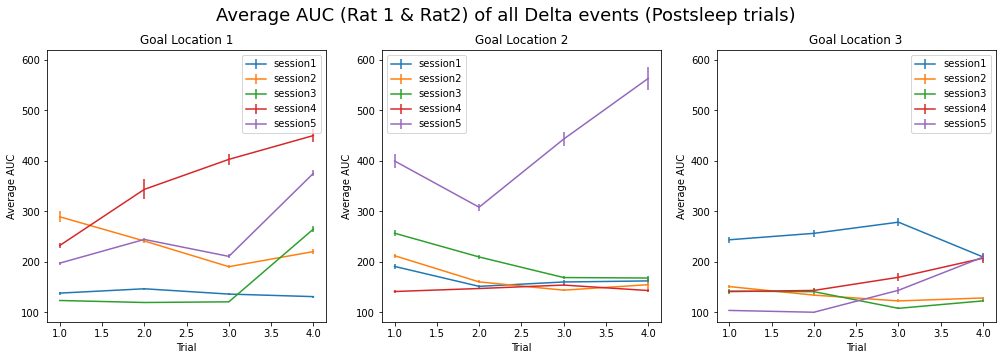

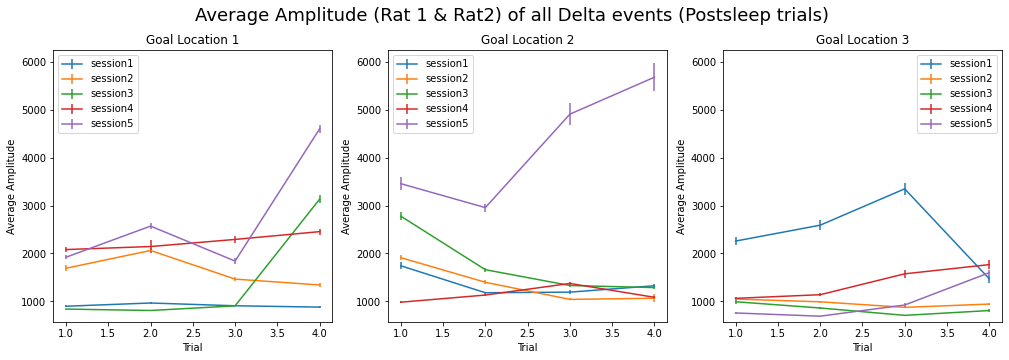

In [ ]:
plot_3_goal_locations(data_delta_avg,'Frequency','avg_freq','Delta','Rat 1 & Rat2')
plot_3_goal_locations(data_delta_avg,'Duration','dur','Delta','Rat 1 & Rat2')
plot_3_goal_locations(data_delta_avg,'AUC','auc','Delta','Rat 1 & Rat2')
plot_3_goal_locations(data_delta_avg,'Amplitude','ampl','Delta','Rat 1 & Rat2')

## Rat 4 Delta event plots

In [ ]:
data_delta_rat4_post = data_delta_rat4[data_delta_rat4.trial > 1]
data_delta_rat4_post.trial -= 1
data_delta_rat4_post['trial'] = pd.Categorical(data_delta_rat4_post.trial, categories=[1,2,3,4], ordered=True)
data_delta_rat4_post['session'] = pd.Categorical(data_delta_rat4_post.session, categories=[0,1,2,3,4,5], ordered=True)
data_delta_rat4_post.dtypes

inst_freq           float64
avg_freq            float64
amplitude           float64
auc                 float64
duration            float64
p2p_dist            float64
power               float64
entropy             float64
num_of_peaks          int64
spect_entropy       float64
study_day          category
goal_location      category
session            category
homecage           category
homecage_number    category
trial              category
rat                category
file_name            object
dtype: object

In [ ]:
data_delta_rat4_post = data_delta_rat4_post[data_delta_rat4_post.goal_location != 0]
data_delta_rat4_post

,inst_freq,avg_freq,amplitude,auc,duration,p2p_dist,power,entropy,num_of_peaks,spect_entropy,study_day,goal_location,session,homecage,homecage_number,trial,rat,file_name
119585,15.932975,2.282419,651.894151,141.649038,0.450000,1081.707881,130454.909548,0.998060,1,6.831987,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
119586,20.607082,5.999780,1453.841463,100.887570,0.336667,1033.219752,119649.597189,0.976966,1,6.245202,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
119587,18.780296,2.776790,690.637083,119.600979,0.375000,1071.273663,133528.215545,0.991076,1,5.917324,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
119588,20.563304,3.947300,731.794966,90.391349,0.358333,959.089521,81840.462860,0.991729,1,6.194203,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
119589,20.351738,2.940994,518.849182,83.032907,0.353333,726.940289,68948.507325,0.998394,1,5.942922,4,1,1,0,0,1,4,Rat_Hm_Ephys_Rat4_389239_20201109_postsleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152190,17.635821,2.639471,546.992049,122.461382,0.408333,987.392039,111813.321809,1.010700,1,5.943524,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep
152191,17.364021,3.256206,490.704077,99.343551,0.405000,814.619857,76360.827097,1.000993,1,6.197656,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep
152192,17.852022,4.490705,682.505350,77.878038,0.426667,924.062572,60902.224767,0.999295,2,6.286294,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep
152193,16.222403,5.121389,1398.832122,169.935879,0.446667,1635.596381,217969.047689,0.999960,2,7.223742,14,3,2,0,0,4,4,Rat_Hm_Ephys_Rat4_389239_20201213_postsleep


In [ ]:
data_delta_avg4 = make_average_df(data_delta_rat4_post)
data_delta_avg4

,goal_location,session,trial,mean_ampl,std_ampl,mean_dur,std_dur,mean_avg_freq,std_avg_freq,mean_auc,std_auc
0,1.0,1.0,1.0,1130.287748,28.106246,0.400292,0.001601,3.433366,0.053412,155.850551,3.488758
1,1.0,1.0,2.0,987.214499,29.772352,0.404797,0.002050,3.388766,0.069065,139.372072,3.542120
2,1.0,1.0,3.0,936.501482,17.112459,0.404496,0.001247,3.488987,0.043455,132.643216,2.154872
3,1.0,1.0,4.0,921.530823,14.361949,0.401689,0.001201,3.622209,0.044975,129.146213,1.895777
4,1.0,2.0,1.0,1223.314625,28.145824,0.400266,0.001095,3.675638,0.058915,156.560216,2.773779
5,1.0,2.0,2.0,1021.089377,16.164132,0.404087,0.000920,3.343377,0.027253,151.830211,2.467386
6,1.0,2.0,3.0,1046.044095,23.611679,0.403634,0.000925,3.369852,0.029785,145.947945,2.545079
7,1.0,2.0,4.0,1055.794472,27.649415,0.404467,0.001047,3.491514,0.034463,141.223211,2.653583
8,1.0,3.0,1.0,1059.812815,16.017578,0.402651,0.000967,3.502060,0.033312,145.638701,1.964944
9,1.0,3.0,2.0,1004.449251,22.250501,0.406085,0.001044,3.298103,0.033936,164.641085,3.960838


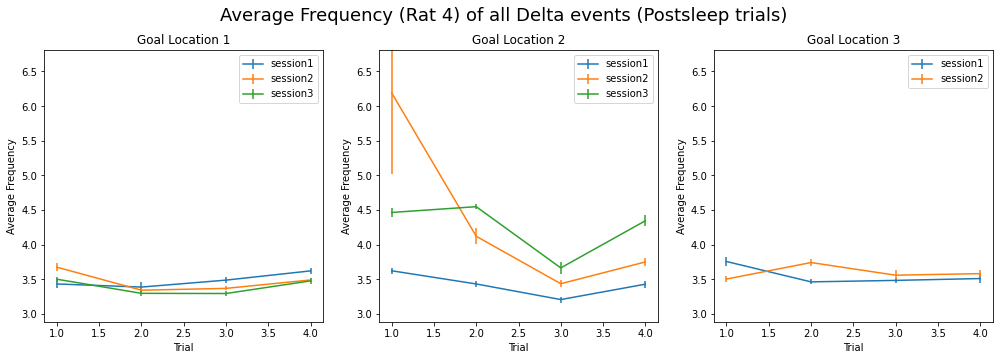

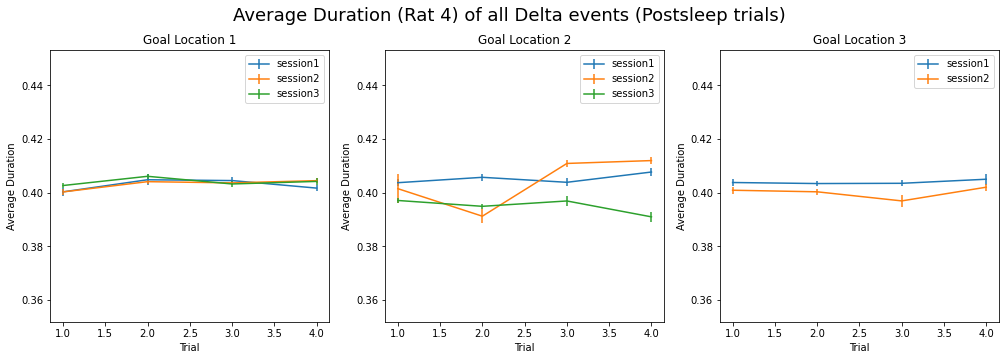

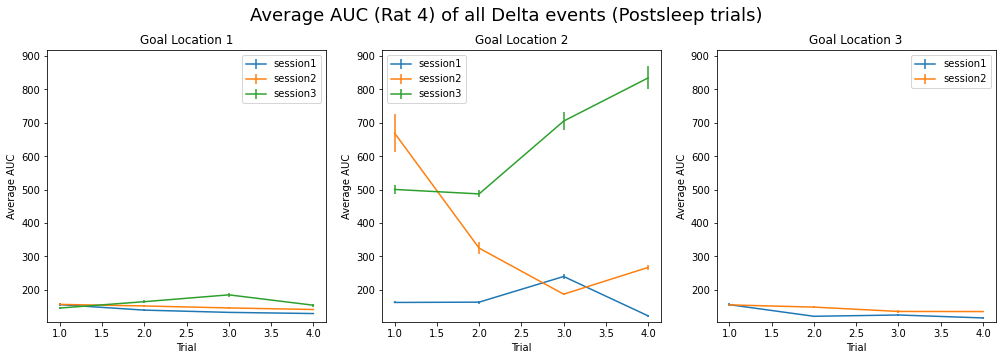

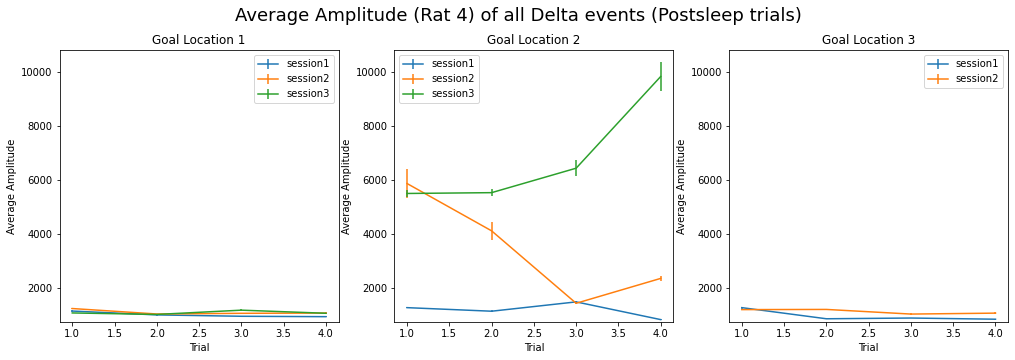

In [ ]:
plot_3_goal_locations(data_delta_avg4,'Frequency','avg_freq','Delta','Rat 4')
plot_3_goal_locations(data_delta_avg4,'Duration','dur','Delta','Rat 4')
plot_3_goal_locations(data_delta_avg4,'AUC','auc','Delta','Rat 4')
plot_3_goal_locations(data_delta_avg4,'Amplitude','ampl','Delta','Rat 4')

# Histogram of duration (for Ripples & Spindles)

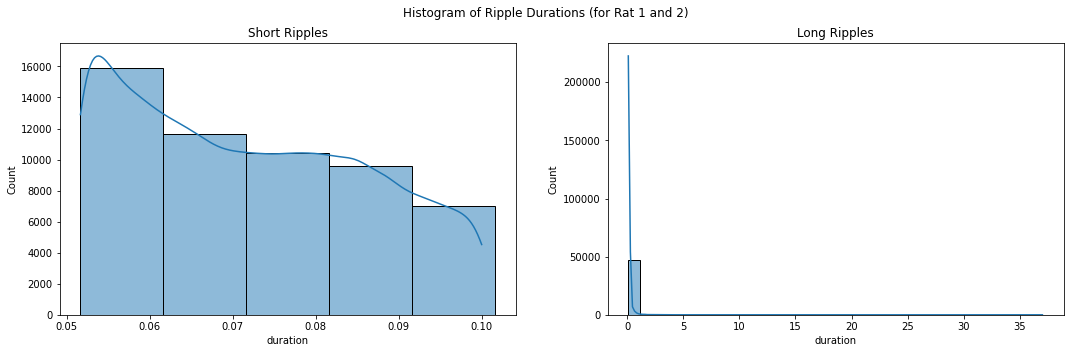

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('Histogram of Ripple Durations (for Rat 1 and 2)')
sns.histplot(ax = axes[0],data=data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 0], x="duration",binwidth=0.01, kde=True)
sns.histplot(ax = axes[1],data=data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 1], x="duration",binwidth= 1, kde=True)
axes[0].set_title('Short Ripples')
axes[1].set_title('Long Ripples');

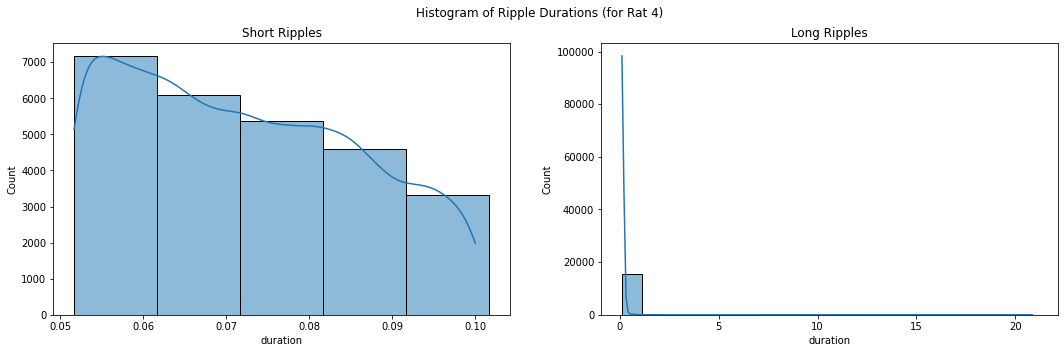

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('Histogram of Ripple Durations (for Rat 4)')
sns.histplot(ax = axes[0],data=data_rip_rat4_post[data_rip_rat4_post.ripple_type == 0], x="duration",binwidth=0.01, kde=True)
sns.histplot(ax = axes[1],data=data_rip_rat4_post[data_rip_rat4_post.ripple_type == 1], x="duration",binwidth= 1, kde=True)
axes[0].set_title('Short Ripples')
axes[1].set_title('Long Ripples');

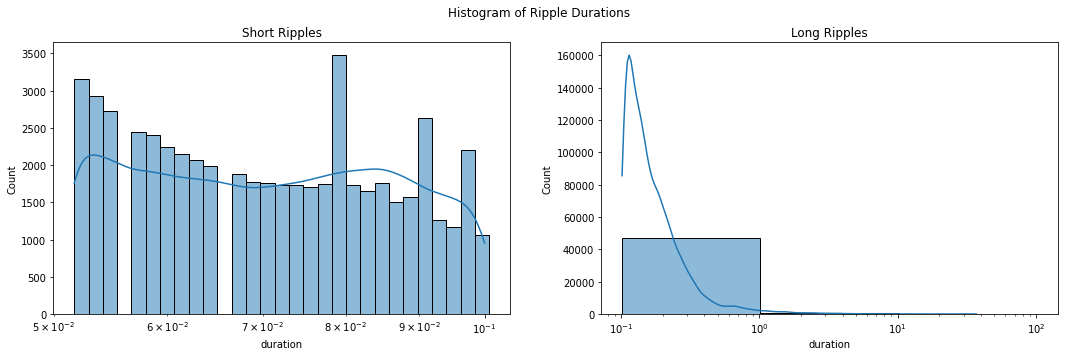

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(18,5))
fig.suptitle('Histogram of Ripple Durations')
sns.histplot(ax = axes[0],data=data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 0], x="duration",log_scale=True,binwidth=0.01, kde=True)
sns.histplot(ax = axes[1],data=data_rip_rat1_2_post[data_rip_rat1_2_post.ripple_type == 1], x="duration",log_scale=True,binwidth= 1, kde=True)
axes[0].set_title('Short Ripples')
axes[1].set_title('Long Ripples');

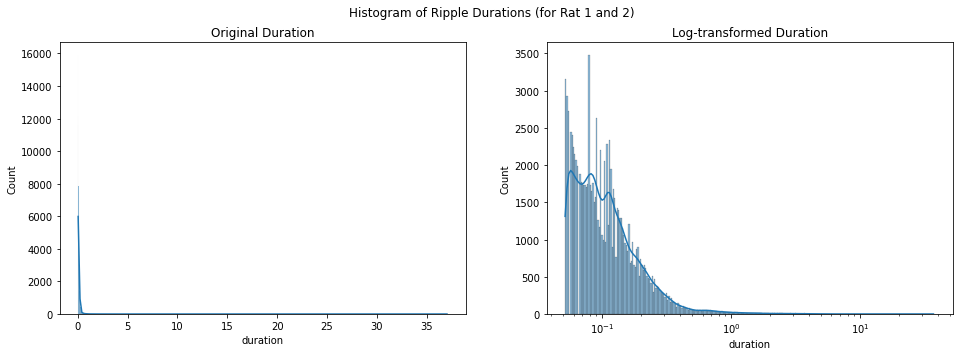

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5))
fig.suptitle('Histogram of Ripple Durations (for Rat 1 and 2)')
sns.histplot(ax = axes[0],data=data_rip_rat1_2_post, x="duration",binwidth=0.01, kde=True)
sns.histplot(ax = axes[1],data=data_rip_rat1_2_post, x="duration", log_scale=True,binwidth=0.01, kde=True)
axes[0].set_title('Original Duration')
axes[1].set_title('Log-transformed Duration');

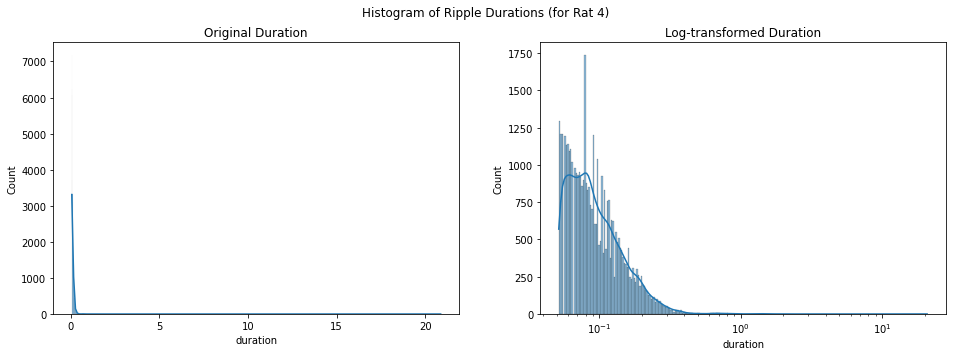

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,5))
fig.suptitle('Histogram of Ripple Durations (for Rat 4)')
sns.histplot(ax = axes[0],data=data_rip_rat4_post, x="duration",binwidth=0.01, kde=True)
sns.histplot(ax = axes[1],data=data_rip_rat4_post, x="duration", log_scale=True,binwidth=0.01, kde=True)
axes[0].set_title('Original Duration')
axes[1].set_title('Log-transformed Duration');